# Amino acid sequence analysis


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import gridspec
import tqdm.notebook as tqdm

from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqRecord import SeqRecord

In [2]:
ORF_FPATH = "../out/orf_sequences_508.tsv"  # path to ORF sequences

OUTDIR = "../out/aaseqs"
os.makedirs(OUTDIR, exist_ok=True)

In [3]:
AA_LIST = sorted([
    'A',  # Alanine
    'R',  # Arginine
    'N',  # Asparagine
    'D',  # Aspartic acid
    'C',  # Cysteine
    'E',  # Glutamic acid
    'Q',  # Glutamine
    'G',  # Glycine
    'H',  # Histidine
    'I',  # Isoleucine
    'L',  # Leucine
    'K',  # Lysine
    'M',  # Methionine
    'F',  # Phenylalanine
    'P',  # Proline
    'S',  # Serine
    'T',  # Threonine
    'W',  # Tryptophan
    'Y',  # Tyrosine
    'V',  # Valine
])
AA_TO_IDX = {aa: i for i, aa in enumerate(AA_LIST)}

In [4]:
# Load the aa sequence data
DF_SEQ = pd.read_csv(ORF_FPATH, delimiter="\t").set_index("orf")
DF_SEQ

,aa_sequence
orf,
Soil11.scaffold_669406189_c1_1,RGCPRGASFSWYIYSPLRVKYPYVRGSLLEFWRDALARHTDPVEAW...
Soil11.scaffold_431547323_c1_2,MSADRFKDEPCRGRCDWEEFYRNRWQYDKVVRSTHGVNCTGSCSWM...
Soil11.scaffold_168782194_c1_1,PDKSRAYKSQRGKGGFLRADWDEVAELIAAAHVHTVKAHGPDRIAG...
Soil11.scaffold_603781636_c1_1,DRVAGFSPIPAMSMASFAAGSRFMSLIGGTLLSFYDWYADLPIASP...
Soil11.scaffold_668984062_c1_1,SPIPAMSMASFAAGSRFMSLIGGTLLSFYDWYADLPVASPQVFGDQ...
...,...
T0.scaffold_40396025_c1_1,MSHFLDRLKFFSKTKETFSNGHGAVVNEDRTWENAYRQRWQHDKIV...
T0.scaffold_273218771_c1_2,MSSSPTNSARGQEPPTRPRNPLLEAHRFLRRGPVNEEGWSQLVAKD...
T0.scaffold_685359621_c1_1,WEYISQDPKRAAQYKTVRGQGGFVRAQWDEVNEIIAASNAFTIKKY...


In [5]:
# Compute sequence lengths, and whether the sequence is complete.
DF_SEQ["length"] = DF_SEQ["aa_sequence"].map(len)
DF_SEQ["start_codon"] = DF_SEQ["aa_sequence"].map(lambda x: x[0] == "M")
DF_SEQ["stop_codon"] = DF_SEQ["aa_sequence"].map(lambda x: x[-1] == "*")
DF_SEQ["complete"] = DF_SEQ["start_codon"] & DF_SEQ["stop_codon"]
DF_SEQ

,aa_sequence,length,start_codon,stop_codon,complete
orf,,,,,
Soil11.scaffold_669406189_c1_1,RGCPRGASFSWYIYSPLRVKYPYVRGSLLEFWRDALARHTDPVEAW...,247,False,False,False
Soil11.scaffold_431547323_c1_2,MSADRFKDEPCRGRCDWEEFYRNRWQYDKVVRSTHGVNCTGSCSWM...,1204,True,True,True
Soil11.scaffold_168782194_c1_1,PDKSRAYKSQRGKGGFLRADWDEVAELIAAAHVHTVKAHGPDRIAG...,169,False,False,False
Soil11.scaffold_603781636_c1_1,DRVAGFSPIPAMSMASFAAGSRFMSLIGGTLLSFYDWYADLPIASP...,327,False,False,False
Soil11.scaffold_668984062_c1_1,SPIPAMSMASFAAGSRFMSLIGGTLLSFYDWYADLPVASPQVFGDQ...,183,False,False,False
...,...,...,...,...,...
T0.scaffold_40396025_c1_1,MSHFLDRLKFFSKTKETFSNGHGAVVNEDRTWENAYRQRWQHDKIV...,572,True,False,False
T0.scaffold_273218771_c1_2,MSSSPTNSARGQEPPTRPRNPLLEAHRFLRRGPVNEEGWSQLVAKD...,1237,True,True,True
T0.scaffold_685359621_c1_1,WEYISQDPKRAAQYKTVRGQGGFVRAQWDEVNEIIAASNAFTIKKY...,726,False,False,False


In [6]:
print(f"Found {np.sum(DF_SEQ["complete"])}/{len(DF_SEQ)} sequences beginning "
      "with start codon (M) and ending with stop codon (*)")

COMPLETE_DF = DF_SEQ.loc[DF_SEQ["complete"]]
COMPLETE_DF

Found 61/508 sequences beginning with start codon (M) and ending with stop codon (*)


,aa_sequence,length,start_codon,stop_codon,complete
orf,,,,,
Soil11.scaffold_431547323_c1_2,MSADRFKDEPCRGRCDWEEFYRNRWQYDKVVRSTHGVNCTGSCSWM...,1204,True,True,True
Soil11.scaffold_587233302_c1_1,MSHFLDRLKFFNRPKETFSDGHGAVVHEDRTWENAYRQRWQHDKIV...,1236,True,True,True
Soil11.scaffold_65427810_c1_20,MRSPLDSPRFFRRIARSAEGWSELAPRGREWERLYRERWEHTRIVR...,1216,True,True,True
Soil11.scaffold_211583530_c1_6,MSHFLDRLNYFSNPRESFADGFGVANGEDRTWEDAYRNRWAHDKIV...,1269,True,True,True
Soil12.scaffold_411182367_c1_117,MASDRFKDEPCGGRCDWEEFYRNRWQYDKVVRSIHGVNCTGSCSWM...,868,True,True,True
...,...,...,...,...,...
Soil9.scaffold_711597457_c1_4,MSSDRYKDERCKGRCDWEEYYRNRWQYDKVVRSTHGVNCTGSCSWM...,1204,True,True,True
T0.scaffold_786865677_c1_2,MSQFLDRLTFFKKYQGTFSEGHGVTTTEDRQWENAYRQRWSHDKIV...,1246,True,True,True
T0.scaffold_172278247_c1_4,MSHFLDRLSFFARSRVEFSGGHGITTTEDRSWEDGYRKRWQHDKIV...,1251,True,True,True


In [7]:
complete_seqs = COMPLETE_DF["aa_sequence"].values
for s in complete_seqs:
    print(s)

MSADRFKDEPCRGRCDWEEFYRNRWQYDKVVRSTHGVNCTGSCSWMVHVKDGIVAWELQAKDYPQFDASIPNYEPRGCARGISYSWYLYSPLRVKYPYVRGALLDRWLEAKESLPDPVEAWQSIVEDPQARASWTGKRGMGGFRRASWELVNEIIAASTVYTAKKYGPDRIIGFTPIPAMSMISYAAGTRFLSLVGGALLSFYDWYCDLPPASPQVWGEQTDVHESADWYSASYIVVAGSNVPMTRSPDMHFLSEVRYRGAKVVVMSPDYSIASKFADAWIPVKQGQDCAYWMALNHVILKEFYVDREVPFFTDYLKKFTDLPFLVKLTPPPGHPLRAGDESEGIWQQGEFLRADELERGAGVENAAWTLCVADKTGAARIPNGSIGSRWSKEPGKWNLDMKDIVDGTEIDCTLSFLGGESRRLRFSFSGEPDAIREVPVHRISTTRGEVTVTTVFDLLLAQFGVSRGLSGDYPRDYNSELPFTPKWQEKHTGIAAGTLIDMAREWAINGEQSSGRNLIIIGSGVNHWYHNDLLYRAAITALILTASVGRNGGGLAHYVGQEKVQPLASWNALAMAYDWVKPTRLQCAPTFWYMHSDQWRYERNYTEYNKPADVLDMPTHVADLNAKAVRMGWLPFAPHFDESTLRLMKQAQHEGCSSDEEIRAWLVERLKNGKTRFASDDPDAPENYPRLWFIWRGNAIASSAKGHEFFLKHVLGTTNSSVTAPEAAKGRVADVHWHEEAGTAKMDLVVDLNFRMDTSAIYSDIVLPTATWYEKSDLNSTDLHSFVNVMDEAVPPVWESKSDWKIFSGLAKRVSELSERHLPSPMKDVVAVALSHDTPGEIAQRTVCDWKLGQCQPVPGKSMPELHIVERDYPKIHDRFLSLGPAMGHLSAHGIGYDAEDVHEELRKKLPNRSWGGECFVDLAEERVVADVILSLAPETNGELASRAYRNLGERVGKPLEAIAEQSRDFRLMWEDIVQKPRRVTSSPIWSGLVNNGRPY

### Compute some simple stats

Look at the lengths of all amino acid sequences, then the subset of complete amino acids.

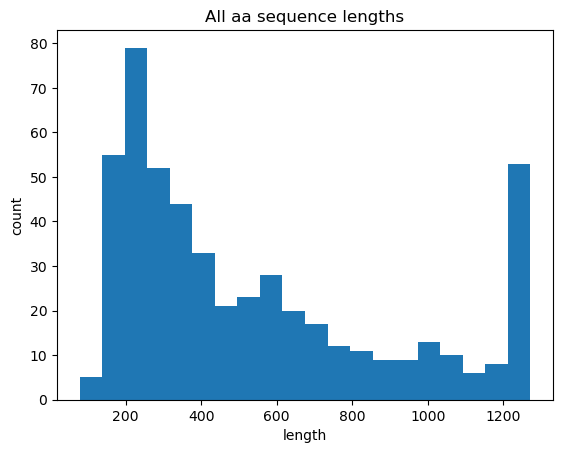

In [8]:
fig, ax = plt.subplots(1, 1)
ax.hist(DF_SEQ["length"], bins=20)

ax.set_xlabel(f"length")
ax.set_ylabel(f"count")
ax.set_title(f"All aa sequence lengths");

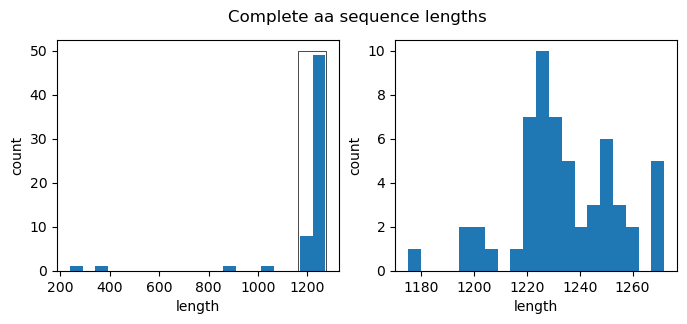

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(8,3))

ax = axes[0]
ax.hist(COMPLETE_DF["length"], bins=20)
ax.set_xlabel(f"length")
ax.set_ylabel(f"count")

x0, y0 = 1160, 0    
x1, y1 = 1275, 50
rect = patches.Rectangle(
    (x0, y0),           # (x, y) = lower-left corner
    x1 - x0,            # width
    y1 - y0,            # height
    linewidth=0.5,
    edgecolor='black',
    facecolor='none'
)
ax.add_patch(rect)

ax = axes[1]
ax.hist(COMPLETE_DF.loc[COMPLETE_DF["length"] > 1100, "length"], bins=20)
ax.set_xlabel(f"length")
ax.set_ylabel(f"count")


fig.suptitle(f"Complete aa sequence lengths");

Let's us `Biopython` to get some additional information about each sequence.

In [10]:
# Initialize the instability and p[AA] columns
DF_SEQ['instability'] = None
for aa in AA_LIST:
    DF_SEQ['p' + aa] = 0.

# Compute instability index and percent composition for each amino acid
for idx, row in DF_SEQ.iterrows():
    seq = row['aa_sequence']
    seq = Seq(seq[0:-1] if seq[-1] == '*' else seq) # Don't include final '*'
    res = ProteinAnalysis(seq)
    aa_comp = res.amino_acids_percent
    for aa in aa_comp:
        p = aa_comp.get(aa, 0.)
        DF_SEQ.loc[idx, 'p' + aa] = p
    instability = res.instability_index()
    DF_SEQ.loc[idx, 'instability'] = instability

DF_SEQ

,aa_sequence,length,start_codon,stop_codon,complete,instability,pA,pC,pD,pE,...,pM,pN,pP,pQ,pR,pS,pT,pV,pW,pY
orf,,,,,,,,,,,,,,,,,,,,,
Soil11.scaffold_669406189_c1_1,RGCPRGASFSWYIYSPLRVKYPYVRGSLLEFWRDALARHTDPVEAW...,247,False,False,False,32.995223,10.931174,0.404858,6.882591,4.048583,...,2.024291,0.809717,6.882591,3.238866,7.287449,6.072874,5.263158,6.882591,4.048583,6.477733
Soil11.scaffold_431547323_c1_2,MSADRFKDEPCRGRCDWEEFYRNRWQYDKVVRSTHGVNCTGSCSWM...,1204,True,True,True,36.383067,8.063175,1.413134,6.234414,6.234414,...,2.161264,3.491272,5.735661,2.244389,6.566916,6.899418,5.153782,7.231920,3.408146,4.322527
Soil11.scaffold_168782194_c1_1,PDKSRAYKSQRGKGGFLRADWDEVAELIAAAHVHTVKAHGPDRIAG...,169,False,False,False,35.287633,14.201183,0.591716,7.692308,2.366864,...,2.958580,1.183432,7.100592,2.366864,4.142012,7.100592,5.325444,7.100592,4.142012,3.550296
Soil11.scaffold_603781636_c1_1,DRVAGFSPIPAMSMASFAAGSRFMSLIGGTLLSFYDWYADLPIASP...,327,False,False,False,45.018379,10.703364,0.000000,7.033639,6.727829,...,2.446483,2.140673,7.645260,2.140673,5.810398,5.198777,7.033639,8.256881,2.752294,3.058104
Soil11.scaffold_668984062_c1_1,SPIPAMSMASFAAGSRFMSLIGGTLLSFYDWYADLPVASPQVFGDQ...,183,False,False,False,40.581475,11.475410,0.000000,9.836066,5.464481,...,3.278689,3.278689,7.103825,1.639344,4.371585,5.464481,6.557377,7.103825,2.732240,3.825137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T0.scaffold_40396025_c1_1,MSHFLDRLKFFSKTKETFSNGHGAVVNEDRTWENAYRQRWQHDKIV...,572,True,False,False,26.88535,8.041958,1.223776,7.517483,4.370629,...,3.146853,4.020979,5.244755,2.972028,5.944056,5.769231,5.944056,7.517483,3.321678,5.069930
T0.scaffold_273218771_c1_2,MSSSPTNSARGQEPPTRPRNPLLEAHRFLRRGPVNEEGWSQLVAKD...,1237,True,True,True,38.798657,9.385113,1.132686,5.987055,7.119741,...,1.941748,2.427184,6.634304,2.750809,8.333333,5.097087,5.663430,8.009709,3.074434,3.317152
T0.scaffold_685359621_c1_1,WEYISQDPKRAAQYKTVRGQGGFVRAQWDEVNEIIAASNAFTIKKY...,726,False,False,False,36.078829,8.677686,0.964187,6.749311,5.509642,...,3.030303,4.407713,5.647383,3.305785,3.856749,6.060606,5.785124,6.473829,3.030303,4.545455


In [11]:
COMPLETE_DF = DF_SEQ[DF_SEQ.complete]
COMPLETE_DF

,aa_sequence,length,start_codon,stop_codon,complete,instability,pA,pC,pD,pE,...,pM,pN,pP,pQ,pR,pS,pT,pV,pW,pY
orf,,,,,,,,,,,,,,,,,,,,,
Soil11.scaffold_431547323_c1_2,MSADRFKDEPCRGRCDWEEFYRNRWQYDKVVRSTHGVNCTGSCSWM...,1204,True,True,True,36.383067,8.063175,1.413134,6.234414,6.234414,...,2.161264,3.491272,5.735661,2.244389,6.566916,6.899418,5.153782,7.231920,3.408146,4.322527
Soil11.scaffold_587233302_c1_1,MSHFLDRLKFFNRPKETFSDGHGAVVHEDRTWENAYRQRWQHDKIV...,1236,True,True,True,32.344243,8.340081,0.971660,5.668016,5.344130,...,3.562753,4.534413,5.506073,3.319838,5.020243,5.991903,6.153846,6.639676,3.076923,3.886640
Soil11.scaffold_65427810_c1_20,MRSPLDSPRFFRRIARSAEGWSELAPRGREWERLYRERWEHTRIVR...,1216,True,True,True,39.808494,8.065844,0.823045,6.172840,7.160494,...,1.975309,1.975309,6.502058,2.962963,8.971193,6.008230,5.349794,8.065844,3.374486,3.868313
Soil11.scaffold_211583530_c1_6,MSHFLDRLNYFSNPRESFADGFGVANGEDRTWEDAYRNRWAHDKIV...,1269,True,True,True,33.728186,8.201893,0.867508,6.466877,5.283912,...,3.391167,3.864353,5.678233,3.785489,5.835962,6.309148,5.914826,7.097792,3.154574,3.864353
Soil12.scaffold_411182367_c1_117,MASDRFKDEPCGGRCDWEEFYRNRWQYDKVVRSIHGVNCTGSCSWM...,868,True,True,True,45.489885,9.111880,1.499423,6.920415,4.728950,...,2.191465,3.114187,6.574394,2.306805,7.958478,8.535179,5.074971,6.459054,4.152249,4.036909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Soil9.scaffold_711597457_c1_4,MSSDRYKDERCKGRCDWEEYYRNRWQYDKVVRSTHGVNCTGSCSWM...,1204,True,True,True,39.855461,8.229426,1.579385,5.985037,6.068163,...,2.327515,3.408146,5.486284,3.158770,6.650042,6.234414,5.652535,6.982544,3.241895,4.156276
T0.scaffold_786865677_c1_2,MSQFLDRLTFFKKYQGTFSEGHGVTTTEDRQWENAYRQRWSHDKIV...,1246,True,True,True,30.998651,8.514056,0.963855,6.024096,6.184739,...,2.008032,3.614458,5.301205,3.373494,6.104418,6.024096,6.345382,6.506024,3.293173,4.096386
T0.scaffold_172278247_c1_4,MSHFLDRLSFFARSRVEFSGGHGITTTEDRSWEDGYRKRWQHDKIV...,1251,True,True,True,35.848904,7.600000,1.040000,6.240000,5.760000,...,2.480000,3.680000,5.840000,2.960000,6.240000,6.400000,5.760000,7.600000,3.200000,4.080000


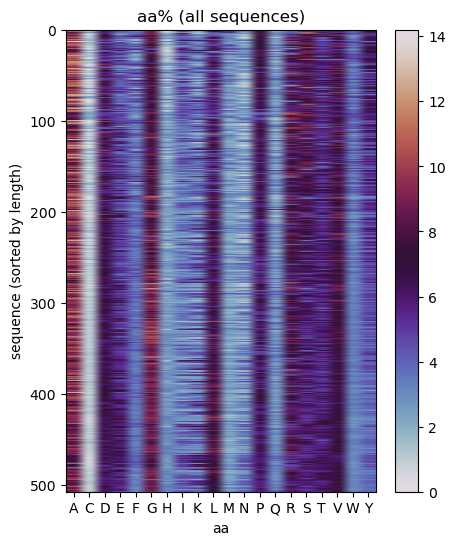

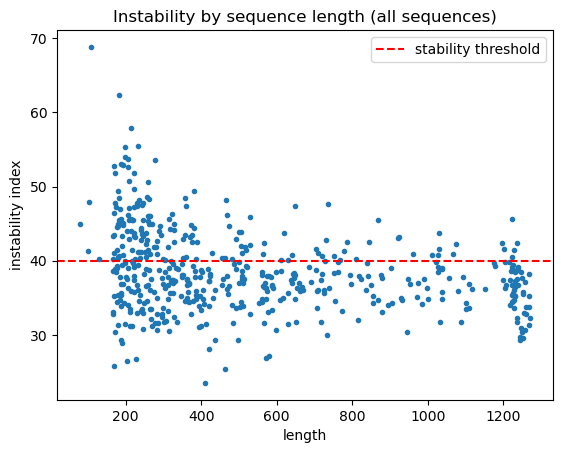

In [12]:
# Plot the composition statistics and the instabilities for all sequences

aa_comp_matrix = DF_SEQ[["p" + aa for aa in AA_LIST]].values
instabilities = DF_SEQ["instability"].values
seq_lengths = DF_SEQ["length"].values
sorted_idxs = np.argsort(seq_lengths)


# Plot composition
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
sc = ax.imshow(aa_comp_matrix[sorted_idxs], aspect="auto", cmap="twilight")
ax.set_xticks(range(len(AA_LIST)), labels=AA_LIST)
ax.set_xlabel(f"aa")
ax.set_ylabel(f"sequence (sorted by length)")
ax.set_title(f"aa% (all sequences)")
fig.colorbar(sc)


# Pot instability
fig, ax = plt.subplots(1, 1)
ax.plot(seq_lengths[sorted_idxs], instabilities[sorted_idxs], '.')
ax.set_xlabel(f"length")
ax.set_ylabel(f"instability index")
ax.set_title(f"Instability by sequence length (all sequences)")
ax.axhline(40, color='r', linestyle="--", label="stability threshold")
ax.legend();


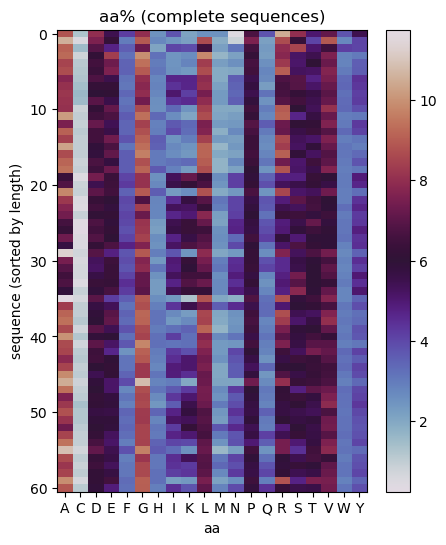

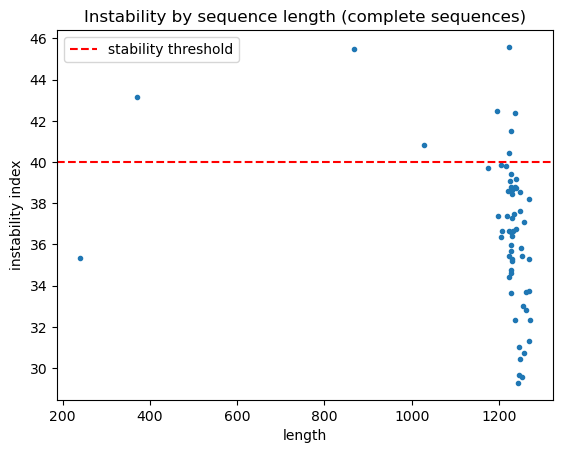

In [13]:
# Plot the composition statistics and the instabilities for all sequences

aa_comp_matrix = COMPLETE_DF[["p" + aa for aa in AA_LIST]].values
instabilities = COMPLETE_DF["instability"].values
seq_lengths = COMPLETE_DF["length"].values
sorted_idxs = np.argsort(seq_lengths)


# Plot composition
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
sc = ax.imshow(aa_comp_matrix[sorted_idxs], aspect="auto", cmap="twilight")
ax.set_xticks(range(len(AA_LIST)), labels=AA_LIST)
ax.set_xlabel(f"aa")
ax.set_ylabel(f"sequence (sorted by length)")
ax.set_title(f"aa% (complete sequences)")
fig.colorbar(sc)


# Pot instability
fig, ax = plt.subplots(1, 1)
ax.plot(seq_lengths[sorted_idxs], instabilities[sorted_idxs], '.')
ax.set_xlabel(f"length")
ax.set_ylabel(f"instability index")
ax.set_title(f"Instability by sequence length (complete sequences)")
ax.axhline(40, color='r', linestyle="--", label="stability threshold")
ax.legend();

### Sequence alignment of long, complete sequences

In [14]:
THRESH = 1100  # Length threshold: keep only "long" seqs at least this length

df = COMPLETE_DF.loc[COMPLETE_DF["length"] > THRESH].copy()
df

,aa_sequence,length,start_codon,stop_codon,complete,instability,pA,pC,pD,pE,...,pM,pN,pP,pQ,pR,pS,pT,pV,pW,pY
orf,,,,,,,,,,,,,,,,,,,,,
Soil11.scaffold_431547323_c1_2,MSADRFKDEPCRGRCDWEEFYRNRWQYDKVVRSTHGVNCTGSCSWM...,1204,True,True,True,36.383067,8.063175,1.413134,6.234414,6.234414,...,2.161264,3.491272,5.735661,2.244389,6.566916,6.899418,5.153782,7.231920,3.408146,4.322527
Soil11.scaffold_587233302_c1_1,MSHFLDRLKFFNRPKETFSDGHGAVVHEDRTWENAYRQRWQHDKIV...,1236,True,True,True,32.344243,8.340081,0.971660,5.668016,5.344130,...,3.562753,4.534413,5.506073,3.319838,5.020243,5.991903,6.153846,6.639676,3.076923,3.886640
Soil11.scaffold_65427810_c1_20,MRSPLDSPRFFRRIARSAEGWSELAPRGREWERLYRERWEHTRIVR...,1216,True,True,True,39.808494,8.065844,0.823045,6.172840,7.160494,...,1.975309,1.975309,6.502058,2.962963,8.971193,6.008230,5.349794,8.065844,3.374486,3.868313
Soil11.scaffold_211583530_c1_6,MSHFLDRLNYFSNPRESFADGFGVANGEDRTWEDAYRNRWAHDKIV...,1269,True,True,True,33.728186,8.201893,0.867508,6.466877,5.283912,...,3.391167,3.864353,5.678233,3.785489,5.835962,6.309148,5.914826,7.097792,3.154574,3.864353
Soil12.scaffold_266712765_c1_2,MSHFLDRLTFFRRNVGTFANGYGITTDEPRDWEDGYRKRWQHDKIV...,1244,True,True,True,29.275809,8.527755,1.045857,6.436042,4.666130,...,2.333065,4.022526,5.953339,2.815768,6.436042,5.309735,7.481899,7.160097,3.378922,4.102977
Soil14.scaffold_576820813_c1_40,MSHLLDRLKFFSQVKAEFSDGHGVVTNEDRKWEDAYRNRWRHDKVV...,1252,True,True,True,29.565324,8.792966,1.199041,5.675460,5.595524,...,2.398082,4.396483,5.595524,3.517186,5.675460,5.515588,5.355715,6.714628,3.117506,3.996803
Soil14.scaffold_280216268_c1_12,MWAHPRLMIWRNTMSHFLDRLKFMSKVKSTFSDGHGAVVDEDRKWE...,1257,True,True,True,30.72965,7.324841,1.035032,6.050955,5.812102,...,3.742038,4.617834,5.414013,2.945860,4.936306,5.971338,5.573248,7.404459,3.184713,3.742038
Soil14.scaffold_465502786_c1_2,MTRSHHHTRNGTPHLDGDVTEALLRTRRFLQKAAVSEDLRTLHQIG...,1239,True,True,True,39.182003,8.642973,0.726979,7.027464,5.169628,...,2.342488,2.423263,6.542811,2.907916,7.592892,5.654281,6.946688,6.946688,2.907916,3.069467
Soil14.scaffold_596019752_c1_119,MGNKKNKLFQKLKYLKHGERINEGWTEESPRTRDWEDIYRRRWQHD...,1228,True,True,True,34.738989,6.275469,0.244499,6.519967,6.193969,...,2.526487,4.726976,5.623472,3.911980,4.971475,5.867971,6.438468,6.112469,3.096985,4.808476


We'll try out using Biopython's [alignment package](https://biopython.org/docs/dev/Tutorial/chapter_align.html) to do alignment of amino acid sequences.
It looks like there are different predefined scoring methods, and that `blastp` corresponds to a protein alignment scheme.

In [15]:
from Bio.Align import PairwiseAligner

seqs = df['aa_sequence'].values

aligner = PairwiseAligner(scoring="blastp")  # Select scoring scheme
print(aligner)

alignments = [[None for _ in range(len(seqs))] for _ in range(len(seqs))]
similarity_matrix = np.nan * np.ones([len(seqs), len(seqs)])
for i in tqdm.trange(len(seqs)):
    seq1 = seqs[i]
    for j in range(i, len(seqs)):
        seq2 = seqs[j]
        alignment = aligner.align(seq1, seq2)
        alignments[i][j] = alignment
        score = alignment.score
        similarity_matrix[i, j] = score
        similarity_matrix[j, i] = score

# Compute the distance matrix from the similarity matrix
distance_matrix = np.max(similarity_matrix) - similarity_matrix

Pairwise sequence aligner with parameters
  substitution_matrix: <Array object at 0x15d4141d0>
  target_internal_open_gap_score: -12.000000
  target_internal_extend_gap_score: -1.000000
  target_left_open_gap_score: -12.000000
  target_left_extend_gap_score: -1.000000
  target_right_open_gap_score: -12.000000
  target_right_extend_gap_score: -1.000000
  query_internal_open_gap_score: -12.000000
  query_internal_extend_gap_score: -1.000000
  query_left_open_gap_score: -12.000000
  query_left_extend_gap_score: -1.000000
  query_right_open_gap_score: -12.000000
  query_right_extend_gap_score: -1.000000
  mode: global



  0%|          | 0/57 [00:00<?, ?it/s]

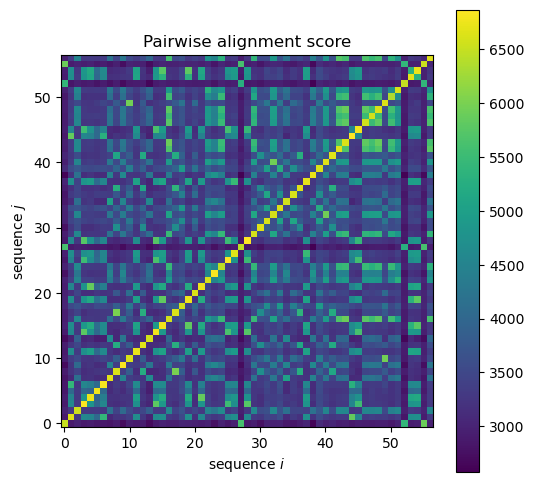

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sc = ax.imshow(similarity_matrix, aspect="equal", cmap="viridis", origin="lower")
ax.set_xlabel(f"sequence $i$")
ax.set_ylabel(f"sequence $j$")
ax.set_title(f"Pairwise alignment score")
fig.colorbar(sc);

Let's now perform [hierarchical clustering with scipy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy).


In [17]:
import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering
linkage = sch.linkage(
    np.triu(distance_matrix), 
    method='single',
)
SIM_THRESH = 0.7 * np.max(linkage[:,2])

# Determine an ordering through a dendrogram
dendro = sch.dendrogram(
    linkage,
    no_plot=True,
)
order = dendro['leaves']
print("Dendrogram ordering:", order)

# Cluster sequences based on linkages
cluster_labels = sch.fcluster(
    linkage, 
    t=SIM_THRESH, 
    criterion='distance'
)

print("Cluster assignments:")
print("--------------------")
for i in range(5):
    print(f"Sequence {i} → Cluster {cluster_labels[i]}")
print("...")

# Reorder the similarity matrix
ordered_similarity_matrix = similarity_matrix[np.ix_(order, order)]
ordered_cluster_labels = cluster_labels[order]

# Store computed cluster in dataframe
df.loc[:,"cluster"] = cluster_labels
df.head()

Dendrogram ordering: [0, 16, 2, 1, 3, 4, 5, 6, 8, 13, 7, 9, 10, 12, 24, 22, 23, 27, 44, 45, 56, 55, 53, 54, 41, 38, 39, 40, 42, 43, 52, 49, 46, 47, 48, 50, 51, 37, 29, 32, 34, 35, 36, 30, 31, 33, 28, 25, 26, 20, 17, 18, 19, 21, 11, 14, 15]
Cluster assignments:
--------------------
Sequence 0 → Cluster 8
Sequence 1 → Cluster 1
Sequence 2 → Cluster 6
Sequence 3 → Cluster 1
Sequence 4 → Cluster 1
...


,aa_sequence,length,start_codon,stop_codon,complete,instability,pA,pC,pD,pE,...,pN,pP,pQ,pR,pS,pT,pV,pW,pY,cluster
orf,,,,,,,,,,,,,,,,,,,,,
Soil11.scaffold_431547323_c1_2,MSADRFKDEPCRGRCDWEEFYRNRWQYDKVVRSTHGVNCTGSCSWM...,1204,True,True,True,36.383067,8.063175,1.413134,6.234414,6.234414,...,3.491272,5.735661,2.244389,6.566916,6.899418,5.153782,7.231920,3.408146,4.322527,8
Soil11.scaffold_587233302_c1_1,MSHFLDRLKFFNRPKETFSDGHGAVVHEDRTWENAYRQRWQHDKIV...,1236,True,True,True,32.344243,8.340081,0.971660,5.668016,5.344130,...,4.534413,5.506073,3.319838,5.020243,5.991903,6.153846,6.639676,3.076923,3.886640,1
Soil11.scaffold_65427810_c1_20,MRSPLDSPRFFRRIARSAEGWSELAPRGREWERLYRERWEHTRIVR...,1216,True,True,True,39.808494,8.065844,0.823045,6.172840,7.160494,...,1.975309,6.502058,2.962963,8.971193,6.008230,5.349794,8.065844,3.374486,3.868313,6
Soil11.scaffold_211583530_c1_6,MSHFLDRLNYFSNPRESFADGFGVANGEDRTWEDAYRNRWAHDKIV...,1269,True,True,True,33.728186,8.201893,0.867508,6.466877,5.283912,...,3.864353,5.678233,3.785489,5.835962,6.309148,5.914826,7.097792,3.154574,3.864353,1
Soil12.scaffold_266712765_c1_2,MSHFLDRLTFFRRNVGTFANGYGITTDEPRDWEDGYRKRWQHDKIV...,1244,True,True,True,29.275809,8.527755,1.045857,6.436042,4.666130,...,4.022526,5.953339,2.815768,6.436042,5.309735,7.481899,7.160097,3.378922,4.102977,1


In [18]:
for idx in order[0:5]:
    print(f"Seq {idx} (cluster {cluster_labels[idx]}):", df.iloc[idx]['aa_sequence'])

Seq 0 (cluster 8): MSADRFKDEPCRGRCDWEEFYRNRWQYDKVVRSTHGVNCTGSCSWMVHVKDGIVAWELQAKDYPQFDASIPNYEPRGCARGISYSWYLYSPLRVKYPYVRGALLDRWLEAKESLPDPVEAWQSIVEDPQARASWTGKRGMGGFRRASWELVNEIIAASTVYTAKKYGPDRIIGFTPIPAMSMISYAAGTRFLSLVGGALLSFYDWYCDLPPASPQVWGEQTDVHESADWYSASYIVVAGSNVPMTRSPDMHFLSEVRYRGAKVVVMSPDYSIASKFADAWIPVKQGQDCAYWMALNHVILKEFYVDREVPFFTDYLKKFTDLPFLVKLTPPPGHPLRAGDESEGIWQQGEFLRADELERGAGVENAAWTLCVADKTGAARIPNGSIGSRWSKEPGKWNLDMKDIVDGTEIDCTLSFLGGESRRLRFSFSGEPDAIREVPVHRISTTRGEVTVTTVFDLLLAQFGVSRGLSGDYPRDYNSELPFTPKWQEKHTGIAAGTLIDMAREWAINGEQSSGRNLIIIGSGVNHWYHNDLLYRAAITALILTASVGRNGGGLAHYVGQEKVQPLASWNALAMAYDWVKPTRLQCAPTFWYMHSDQWRYERNYTEYNKPADVLDMPTHVADLNAKAVRMGWLPFAPHFDESTLRLMKQAQHEGCSSDEEIRAWLVERLKNGKTRFASDDPDAPENYPRLWFIWRGNAIASSAKGHEFFLKHVLGTTNSSVTAPEAAKGRVADVHWHEEAGTAKMDLVVDLNFRMDTSAIYSDIVLPTATWYEKSDLNSTDLHSFVNVMDEAVPPVWESKSDWKIFSGLAKRVSELSERHLPSPMKDVVAVALSHDTPGEIAQRTVCDWKLGQCQPVPGKSMPELHIVERDYPKIHDRFLSLGPAMGHLSAHGIGYDAEDVHEELRKKLPNRSWGGECFVDLAEERVVADVILSLAPETNGELASRAYRNLGERVGKPLEAIAEQSRDFRLMWEDIVQKP

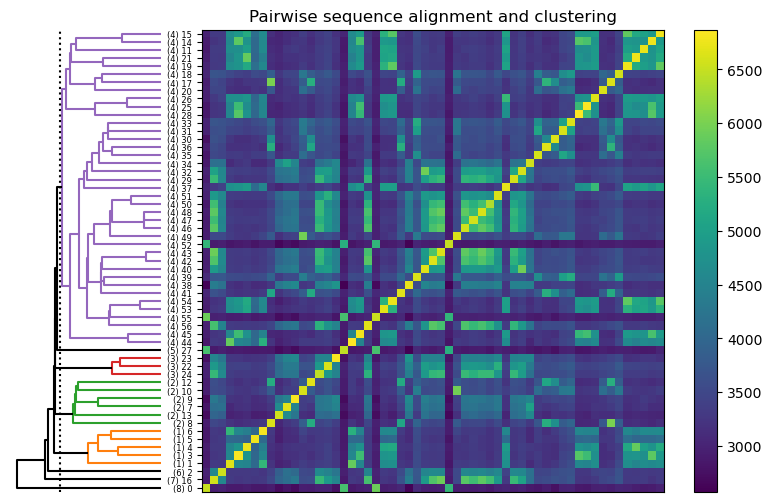

In [19]:
fig = plt.figure(figsize=(10, 6))

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 4], wspace=0.05)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

# Plot dendrogram
dendro = sch.dendrogram(
    linkage, 
    orientation="left",
    no_labels=True,
    color_threshold=SIM_THRESH,
    above_threshold_color='k',
    ax=ax0, 
)
assert np.allclose(order, dendro["leaves"]), "Order changed!"
ax0.axvline(SIM_THRESH, color='k', linestyle=':')
ax0.axis('off')

# Plot similarity matrix
# to_plot = ordered_similarity_matrix.copy()
# np.fill_diagonal(to_plot, np.nan)
to_plot = ordered_similarity_matrix
sc = ax1.imshow(
    to_plot, 
    aspect="equal", 
    cmap="viridis", 
    origin="lower"
)

fig.colorbar(sc)
ax1.set_title(f"Pairwise sequence alignment and clustering");
ax1.set_xticks([]);
ax1.set_yticks(
    range(len(seqs)), 
    labels=[f"({c}) {i}" for c, i in zip(ordered_cluster_labels, order)], 
    fontsize=6
);

### Save output

In [20]:
np.savetxt(f"{OUTDIR}/long_complete_orf_ids.txt", 
           df.index.values, "%s")
np.savetxt(f"{OUTDIR}/long_complete_aa_seqs.txt", 
           [s[0:-1] for s in df.aa_sequence.values], "%s")
df.to_csv(f"{OUTDIR}/long_complete_dataframe.csv")

In [21]:
# Save fasta files for sequences
records = []
for idx, row in df.iterrows():
    seq = row["aa_sequence"][0:-1]
    id = str(idx)
    record = SeqRecord(Seq(seq), id=id, name=id, description="")
    records.append(record)
    
SeqIO.write(records, f"{OUTDIR}/long_complete_aa_seqs.fasta", "fasta")

57

## Examine particular sequences

In [22]:
good_data_orfs_tier1 = [
    'Soil17.scaffold_133787210_c1_1',
    'Soil12.scaffold_666676376_c1_1',
    'Soil16.scaffold_804923086_c1_3',
    'Soil16.scaffold_284770402_c1_10',
    'Soil17.scaffold_694072686_c1_1',
    'Soil3.scaffold_63658123_c1_64',
    'Soil17.scaffold_146768584_c1_1',
    'Soil6.scaffold_640761477_c1_1',
]

good_data_orfs_tier2 = [
    'T0.scaffold_1146579158_c1_1',
    'Soil9.scaffold_2866533_c1_1',
    'Soil6.scaffold_645328969_c1_1',
    'T0.scaffold_967757664_c1_1',
    'Soil3.scaffold_31685847_c1_1',
    'Soil9.scaffold_175774837_c1_4',
    'T0.scaffold_786865677_c1_2',
    'Soil5.scaffold_416434691_c1_48',
    'Soil11.scaffold_65427810_c1_20',
    'Soil9.scaffold_463652061_c1_3',
    'Soil5.scaffold_376523767_c1_1',
    'Soil6.scaffold_604673340_c1_1',
    'Soil11.scaffold_437898375_c1_1',
    'T0.scaffold_172278247_c1_4',
    'Soil3.scaffold_253488375_c1_4',
    'Soil14.scaffold_1008884942_c1_1',
    'Soil9.scaffold_766455321_c1_2',
    'Soil12.scaffold_266712765_c1_2',
    'Soil12.scaffold_623841069_c1_1',
    'Soil3.scaffold_202054849_c1_1',
    'Soil9.scaffold_797403003_c1_2',
    'Soil3.scaffold_285743490_c1_2',
    'Soil3.scaffold_432205656_c1_9',
    'Soil15.scaffold_60684249_c1_1',
    'Soil17.scaffold_186252750_c1_1',
    'Soil17.scaffold_1202428475_c1_2',
    'Soil17.scaffold_1322787586_c1_1',
    'Soil16.scaffold_718712853_c1_1',
]

print('Tier1')
tier1_orfs = []
for orfid in good_data_orfs_tier1:
    in_df = orfid in df.index.values
    if in_df:
        print(" Found", orfid, "\t", df.loc[orfid]["aa_sequence"])
        tier1_orfs.append(orfid)

print('Tier2')
tier2_orfs = []
for orfid in good_data_orfs_tier2:
    in_df = orfid in df.index.values
    if in_df:
        print(" Found", orfid, "\t", df.loc[orfid]["aa_sequence"])
        tier2_orfs.append(orfid)


Tier1
 Found Soil16.scaffold_804923086_c1_3 	 MSHFLDRLTYFSQPRESFSGDHGQTTEEDRTWEDAYRARWAHDKIVRSTHGVNCTGSCSWKIYVKGGIVTWETQQTDYPRTRWDMPNHEPRGCARGASYSWYLYSANRVKYPMVRGRLLKAWRDARRSMPPVQAWAAIVADDAKRKSWQSVRGLGGFTRSSWEEVNEIIAAANIHTIRQHGPDRIIYFSPIPAMSMVSYAAGSRYLSLIGGVCMSFYDWYCDLPPASPQIWGEQTDVPESADWYNSSYIIAWGSNVPQTRTPDAHFFTEVRYKGAKTVAITPDYSEVAKLSDLWMHPKQGTDAAVAMAMGHVILKEFYFDKRSAYFDDYARRYTDLPMLVMLKEHTLPSGETVMVPDRYVRASDFNGKLGQSNNPEWKTVAFDEGGKVVLPKGAIGFRWGPDGRPDQGQWNLEDKEARHDQQVKLQLSVLEGDAPSSETAKIGFPYFGGIETPNFSHNSQGGDVLVRTVPVRTISLGKAGEERSALVATVFDLQAANYGVARGLAGELAAKSFDDDTPYTPAWQEQITGVPRDQIITVARQFADNADKTHGKSMVIIGAAMNHWYHADMNYRGVINMLMMCGCIGQSGGGWAHYVGQEKLRPQTGWTALAFALDWIRPPRQMNSTSFFYAHTDQWRYEKLGMEEVLSPLADKKAFAGSMIDYNVRAERMGWLPSAPQLQTNPMQVVRDAQAAGMDGKEYVVKALKDGSLRMSCEDPDHPANWPRNLFVWRSNILGSSGKGHEYFLKHLLGTSHGVQGKDLGADEAKPTEVVWHDKAPEGKLDLVVTLDFRMSTTCLYSDIVLPTATWYEKNDLNTSDMHPFIHPLSTAVDPAWQSKSDWEIYKGFAKKFSELCPGHLGVEKEVVLTPLMHDSPAELAQPFGVSDWKRGECDLIPGKTAPQIAVVERDYPNVYKRFMALGPLMNKVGNGGKGISWNTQTEVEQLGQLNGLVTEAG

In [ ]:
# Save fasta files for tier1 sequences
records = []
# for idx, row in df.iterrows():
for id in tier1_orfs:
    row = df.loc[id]
    seq = row["aa_sequence"][0:-1]
    record = SeqRecord(Seq(seq), id=id, name=id, description="")
    records.append(record)

outdir = f"{OUTDIR}/tier1_aa_seqs"
os.makedirs(outdir, exist_ok=True)
for record in records:
    SeqIO.write(record, f"{outdir}/{record.id}.fasta", "fasta")

1

In [ ]:
# Save fasta files for tier2 sequences
records = []
# for idx, row in df.iterrows():
for id in tier2_orfs:
    row = df.loc[id]
    seq = row["aa_sequence"][0:-1]
    record = SeqRecord(Seq(seq), id=id, name=id, description="")
    records.append(record)

outdir = f"{OUTDIR}/tier2_aa_seqs"
os.makedirs(outdir, exist_ok=True)
for record in records:
    SeqIO.write(record, f"{outdir}/{record.id}.fasta", "fasta")

9